# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

#create an empty list to hold the city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
#     Parse the JSON and retrieve data
    city_weather = requests.get(city_url).json()
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        latitude = city_weather["coord"]["lat"]
        longitude = city_weather["coord"]["lon"]
        temperature = city_weather["main"]["temp_max"]
        humidity = city_weather["main"]["humidity"]
        clouds = city_weather["clouds"]["all"]
        wind = city_weather["wind"]["speed"]
        country = city_weather["sys"]["country"]
        date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": latitude, 
                          "Lng": longitude, 
                          "Max Temp": temperature,
                          "Humidity": humidity,
                          "Cloudiness": clouds,
                          "Wind Speed": wind,
                          "Country": country,
                          "Date": date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | faanui
Processing Record 4 of Set 1 | okhotsk
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | huadian
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | ust-kamchatsk
City not found. Skipping...
Processing Record 9 of Set 1 | sorland
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | katsuura
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | bouca
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | lompoc
Processing Record 21 of Set 1 | rikitea
Processing Record 

Processing Record 37 of Set 4 | high level
Processing Record 38 of Set 4 | burnie
Processing Record 39 of Set 4 | clyde river
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | atambua
Processing Record 42 of Set 4 | norman wells
Processing Record 43 of Set 4 | ossora
Processing Record 44 of Set 4 | qaqortoq
Processing Record 45 of Set 4 | san jeronimo
Processing Record 46 of Set 4 | edd
Processing Record 47 of Set 4 | aksarka
Processing Record 48 of Set 4 | santa fe
Processing Record 49 of Set 4 | ostroleka
Processing Record 0 of Set 5 | yumen
Processing Record 1 of Set 5 | touros
Processing Record 2 of Set 5 | sao felix do xingu
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | palana
Processing Record 5 of Set 5 | lasa
Processing Record 6 of Set 5 | gloversville
Processing Record 7 of Set 5 | pacific grove
Processing Record 8 of Set 5 | cherskiy
Processing Record 9 of Set 5 | bairiki
Processing Record 10 of Set 5 | vaitupu
City n

Processing Record 26 of Set 8 | salalah
Processing Record 27 of Set 8 | chapais
Processing Record 28 of Set 8 | turayf
Processing Record 29 of Set 8 | kenai
Processing Record 30 of Set 8 | san andres
Processing Record 31 of Set 8 | maningrida
Processing Record 32 of Set 8 | provideniya
Processing Record 33 of Set 8 | riyadh
Processing Record 34 of Set 8 | pitimbu
Processing Record 35 of Set 8 | pangnirtung
Processing Record 36 of Set 8 | zhanaozen
Processing Record 37 of Set 8 | mindelo
Processing Record 38 of Set 8 | lavrentiya
Processing Record 39 of Set 8 | horsham
Processing Record 40 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 41 of Set 8 | hurghada
Processing Record 42 of Set 8 | vostok
Processing Record 43 of Set 8 | grindavik
Processing Record 44 of Set 8 | te anau
Processing Record 45 of Set 8 | goma
Processing Record 46 of Set 8 | hobyo
Processing Record 47 of Set 8 | beringovskiy
Processing Record 48 of Set 8 | kavaratti
Processing Record 49 of Set

Processing Record 12 of Set 12 | ucluelet
Processing Record 13 of Set 12 | kitui
Processing Record 14 of Set 12 | walvis bay
Processing Record 15 of Set 12 | portree
Processing Record 16 of Set 12 | san juan
Processing Record 17 of Set 12 | warrnambool
Processing Record 18 of Set 12 | tsentralnyy
City not found. Skipping...
Processing Record 19 of Set 12 | muros
Processing Record 20 of Set 12 | chicama
Processing Record 21 of Set 12 | piacabucu
Processing Record 22 of Set 12 | sortova
Processing Record 23 of Set 12 | ozgon
City not found. Skipping...
Processing Record 24 of Set 12 | chumikan
Processing Record 25 of Set 12 | darnah
Processing Record 26 of Set 12 | opole lubelskie
Processing Record 27 of Set 12 | parkes
Processing Record 28 of Set 12 | mizpe ramon
City not found. Skipping...
Processing Record 29 of Set 12 | imbituba
Processing Record 30 of Set 12 | port hedland
Processing Record 31 of Set 12 | coquimbo
Processing Record 32 of Set 12 | mujiayingzi
Processing Record 33 of 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,78.55,91,53,5.01,EC,1685588377
1,Georgetown,5.4112,100.3354,89.55,70,40,4.61,MY,1685588362
2,Faanui,-16.4833,-151.7500,77.67,64,3,16.04,PF,1685588406
3,Okhotsk,59.3833,143.3000,56.66,54,100,15.39,RU,1685588376
4,Atuona,-9.8000,-139.0333,80.49,77,98,11.05,PF,1685588376


In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,78.55,91,53,5.01,EC,1685588377
1,Georgetown,5.4112,100.3354,89.55,70,40,4.61,MY,1685588362
2,Faanui,-16.4833,-151.7500,77.67,64,3,16.04,PF,1685588406
3,Okhotsk,59.3833,143.3000,56.66,54,100,15.39,RU,1685588376
4,Atuona,-9.8000,-139.0333,80.49,77,98,11.05,PF,1685588376


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Puerto Ayora,-0.7393,-90.3518,78.55,91,53,5.01,EC,1685588377
1,Georgetown,5.4112,100.3354,89.55,70,40,4.61,MY,1685588362
2,Faanui,-16.4833,-151.7500,77.67,64,3,16.04,PF,1685588406
3,Okhotsk,59.3833,143.3000,56.66,54,100,15.39,RU,1685588376
4,Atuona,-9.8000,-139.0333,80.49,77,98,11.05,PF,1685588376
...,...,...,...,...,...,...,...,...,...
554,Mayo,38.8876,-76.5119,66.97,86,0,4.61,US,1685588740
555,Buenaventura,3.8801,-77.0312,75.96,94,100,2.64,CO,1685589042
556,Zelenoborsk,61.4669,64.0333,68.38,62,100,12.15,RU,1685589042


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

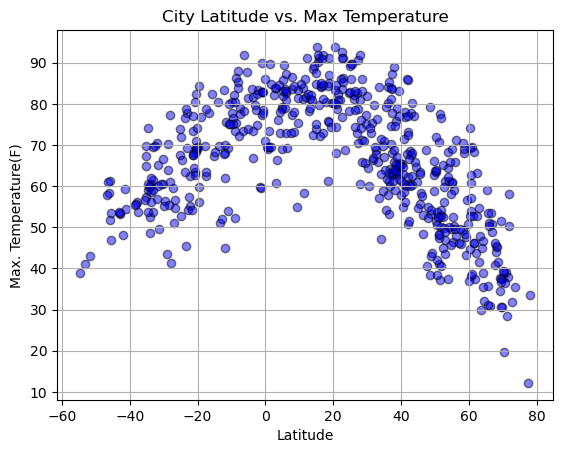

In [11]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties 
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature(F)')
plt.title('City Latitude vs. Max Temperature')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

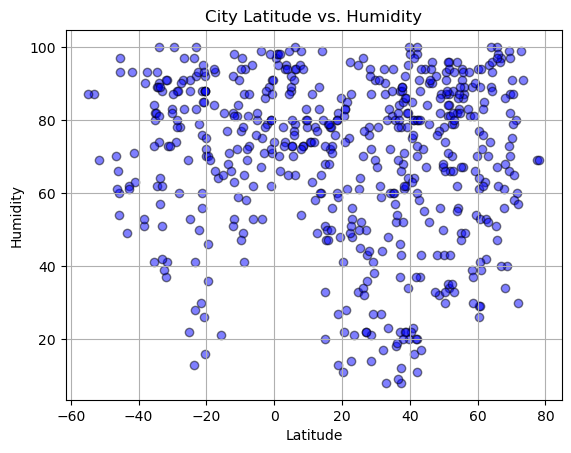

In [12]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

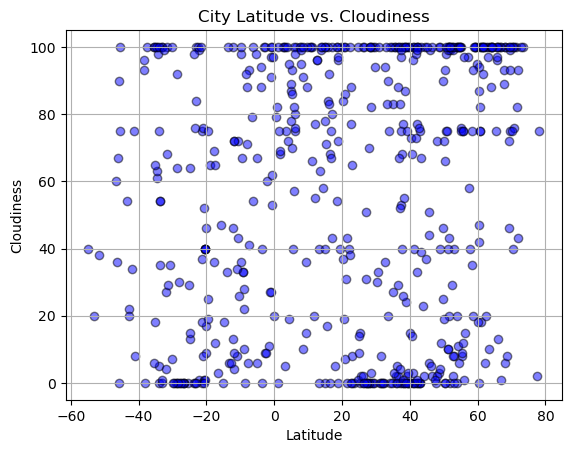

In [14]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

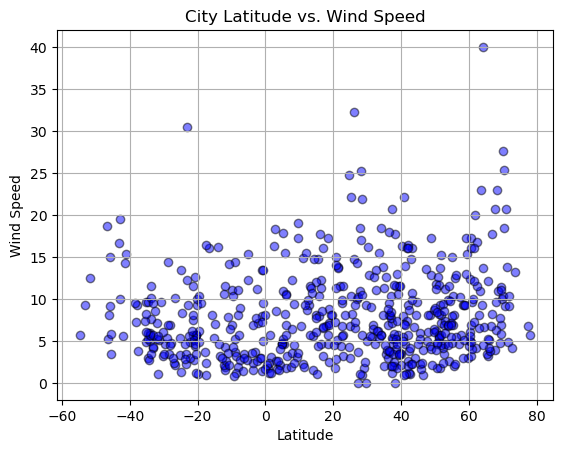

In [15]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [63]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x_values, y_values):
    # Perform linear regression
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)

    # Create scatter plot
    plt.scatter(x_values, y_values, marker='o', color='blue', alpha=0.5, label='Data Points')

    # Create regression line
    regression_line = slope * x_values + intercept
    plt.plot(x_values, regression_line, color='red', label='Regression Line')

    # Determine the appropriate coordinates for annotation
    # Add 5% to the maximum x-value
    x_annotate = x_values.max() + (x_values.max() - x_values.min()) * 0.05  
    # Add 5% to the maximum y-value
    y_annotate = regression_line.max() + (regression_line.max() - regression_line.min()) * 0.05  

# Annotate the line equation
    line_eq = f'y = {str(round(slope, 2))}x + {str(round(intercept, 2))}'
    plt.annotate(line_eq, (x_annotate, y_annotate), fontsize=15, color='r')
    print(f'The r-value is: {rvalue}')
    
    # Display legend
    plt.legend()

    # Show plot
    plt.show()

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Georgetown,5.4112,100.3354,89.55,70,40,4.61,MY,1685588362
3,Okhotsk,59.3833,143.3000,56.66,54,100,15.39,RU,1685588376
5,Huadian,42.9633,126.7478,77.85,37,0,14.74,CN,1685588931
6,Sorland,67.6670,12.6934,40.86,56,93,20.69,NO,1685588455
8,Nikolskoye,59.7035,30.7861,50.81,70,95,2.91,RU,1685588383


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Puerto Ayora,-0.7393,-90.3518,78.55,91,53,5.01,EC,1685588377
2,Faanui,-16.4833,-151.7500,77.67,64,3,16.04,PF,1685588406
4,Atuona,-9.8000,-139.0333,80.49,77,98,11.05,PF,1685588376
7,Vaini,-21.2000,-175.2000,77.16,88,75,11.50,TO,1685588372
9,Kruisfontein,-34.0033,24.7314,52.41,74,0,5.99,ZA,1685588442


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7844969690237137


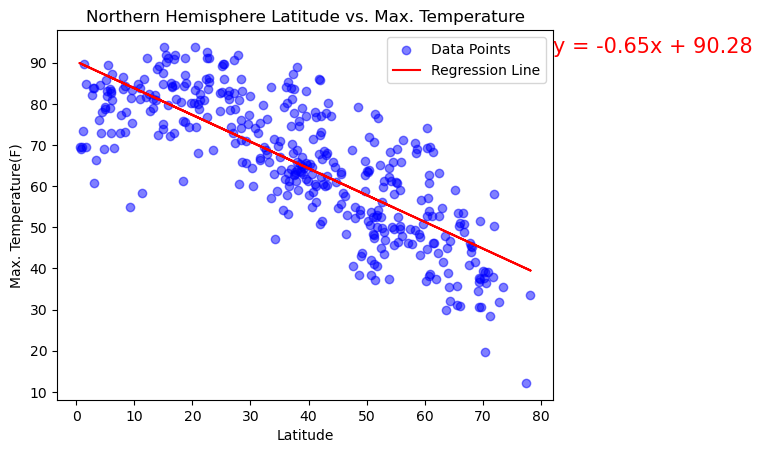

In [66]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature(F)')
plt.title('Northern Hemisphere Latitude vs. Max. Temperature')

create_linear_regression_plot(x_values, y_values)


The r-value is: 0.695573811576806


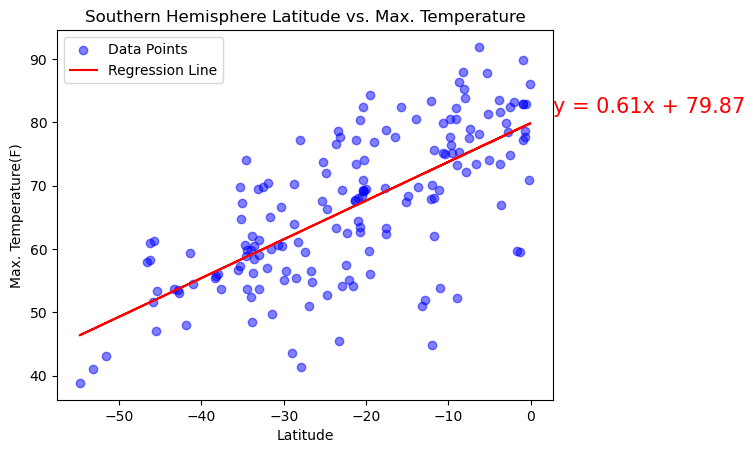

In [67]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Max. Temperature(F)')
plt.title('Southern Hemisphere Latitude vs. Max. Temperature')

create_linear_regression_plot(x_values, y_values)

**Discussion about the linear relationship:** The relationship between latitude and max temperature is clear. As the latitude in the northern hemisphere increases, the temperature decreases. We see the opposite for the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.00033617746710032885


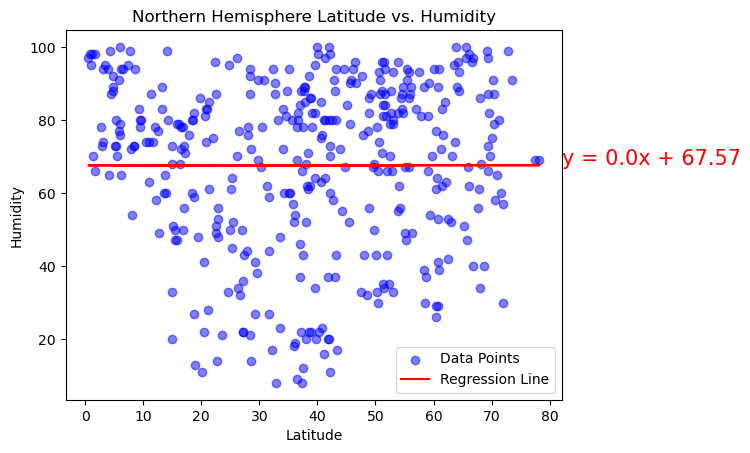

In [69]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere Latitude vs. Humidity')

create_linear_regression_plot(x_values, y_values)

The r-value is: 0.059885295930390985


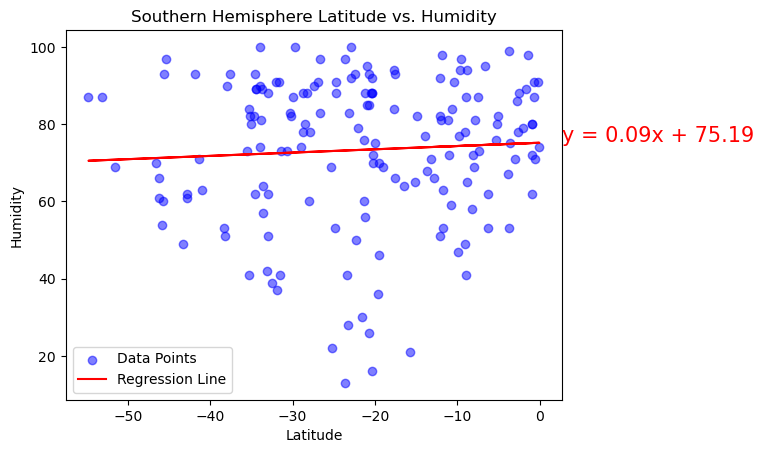

In [70]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere Latitude vs. Humidity')

create_linear_regression_plot(x_values, y_values)

**Discussion about the linear relationship:** There is slight correlation between latitude and humidity in the northern and southern hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03121380835959468


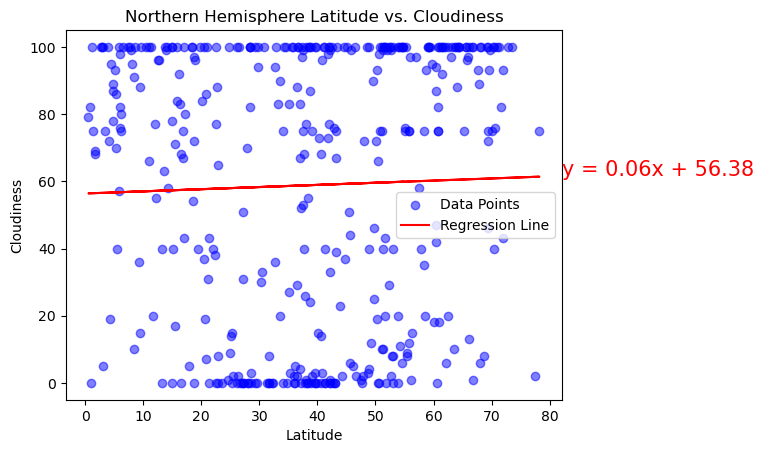

In [71]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')

create_linear_regression_plot(x_values, y_values)

The r-value is: 0.044405797382774455


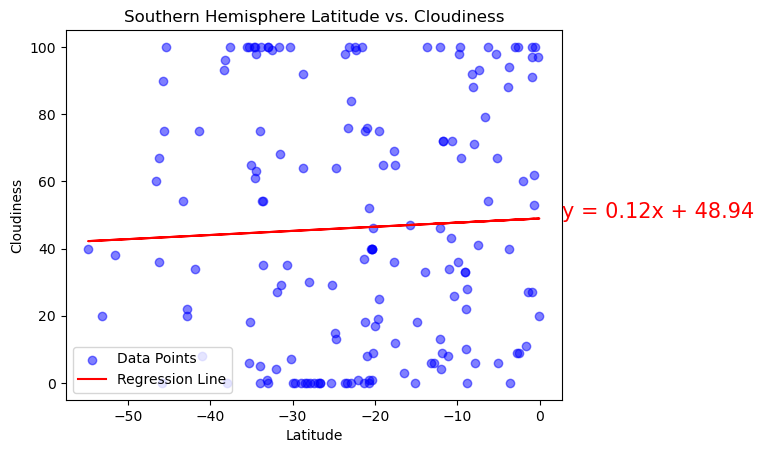

In [72]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')

create_linear_regression_plot(x_values, y_values)

**Discussion about the linear relationship:** There is a slight positive correlation between the latitude and the cloudiness of cities in the northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.112052355872154


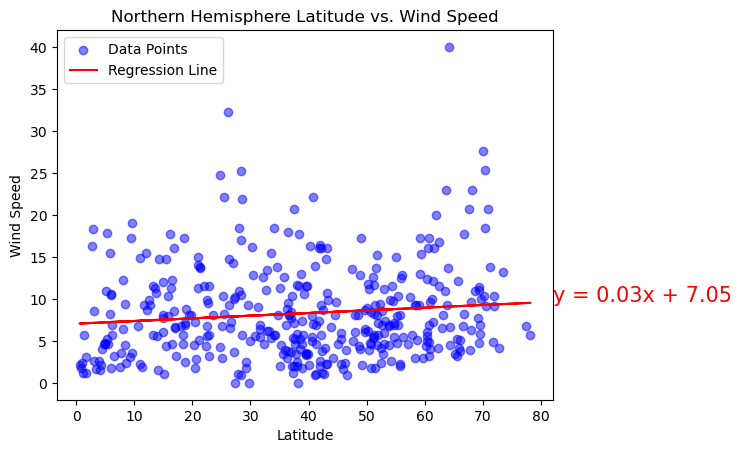

In [73]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')

create_linear_regression_plot(x_values, y_values)

The r-value is: -0.1838555167090535


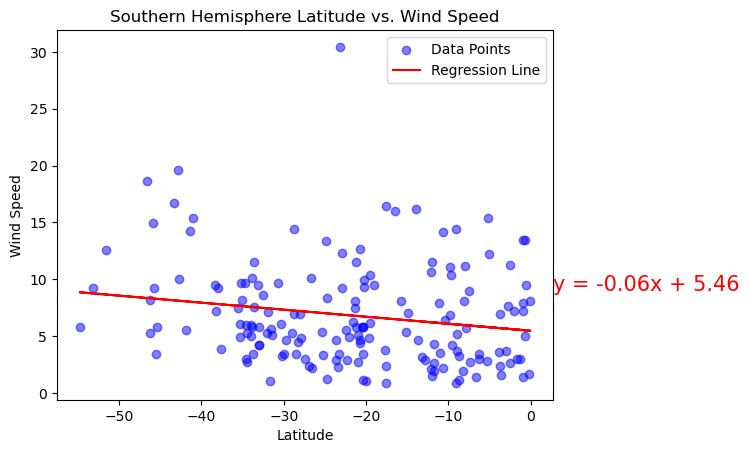

In [74]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Set labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')

create_linear_regression_plot(x_values, y_values)

**Discussion about the linear relationship:** There seems to be little to no correlation between the latitude and wind speed of cities in the northern hemisphere. There is a slight negative correlation between these same two factors for the cities in the southen hemisphere.